In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind, ttest_rel
import scipy.stats as stats
import pandas as pd

In [2]:
dataset=pd.read_csv("Automobiledata.csv")

In [3]:
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,chevrolet chevelle malibu,usa
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,buick skylark 320,usa
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,plymouth satellite,usa
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,amc rebel sst,usa
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,ford torino,usa
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,ford mustang gl,usa
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,vw pickup,europe
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,dodge rampage,usa
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,ford ranger,usa


In [4]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
name            0
origin          0
dtype: int64

In [5]:
dataset.cov()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,61.089611,-10.308911,-655.402318,-237.405511,-5505.211745,9.058930,16.741163
cylinders,-10.308911,2.893415,168.623214,56.282369,1290.695575,-2.370842,-2.193499
displacement,-655.402318,168.623214,10872.199152,3661.134476,82368.423240,-156.332976,-142.717137
horsepower,-237.405511,56.282369,3661.134476,1621.636191,28576.966837,-74.841663,-61.286090
weight,-5505.211745,1290.695575,82368.423240,28576.966837,717140.990526,-974.899011,-959.946344
acceleration,9.058930,-2.370842,-156.332976,-74.841663,-974.899011,7.604848,2.938105
model_year,16.741163,-2.193499,-142.717137,-61.286090,-959.946344,2.938105,13.672443


In [6]:
dataset.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.754276,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164
horsepower,-0.754276,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587
weight,-0.831741,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000


In [7]:
dataset.drop('weight',inplace=True,axis=1)

In [8]:
dataset

,mpg,cylinders,displacement,horsepower,acceleration,model_year,name,origin
0,18.0,8.0,307.0,130.0,12.0,70.0,chevrolet chevelle malibu,usa
1,15.0,8.0,350.0,165.0,11.5,70.0,buick skylark 320,usa
2,18.0,8.0,318.0,150.0,11.0,70.0,plymouth satellite,usa
3,16.0,8.0,304.0,150.0,12.0,70.0,amc rebel sst,usa
4,17.0,8.0,302.0,140.0,10.5,70.0,ford torino,usa
...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,15.6,82.0,ford mustang gl,usa
394,44.0,4.0,97.0,52.0,24.6,82.0,vw pickup,europe
395,32.0,4.0,135.0,84.0,11.6,82.0,dodge rampage,usa
396,28.0,4.0,120.0,79.0,18.6,82.0,ford ranger,usa


In [9]:
import seaborn as sns

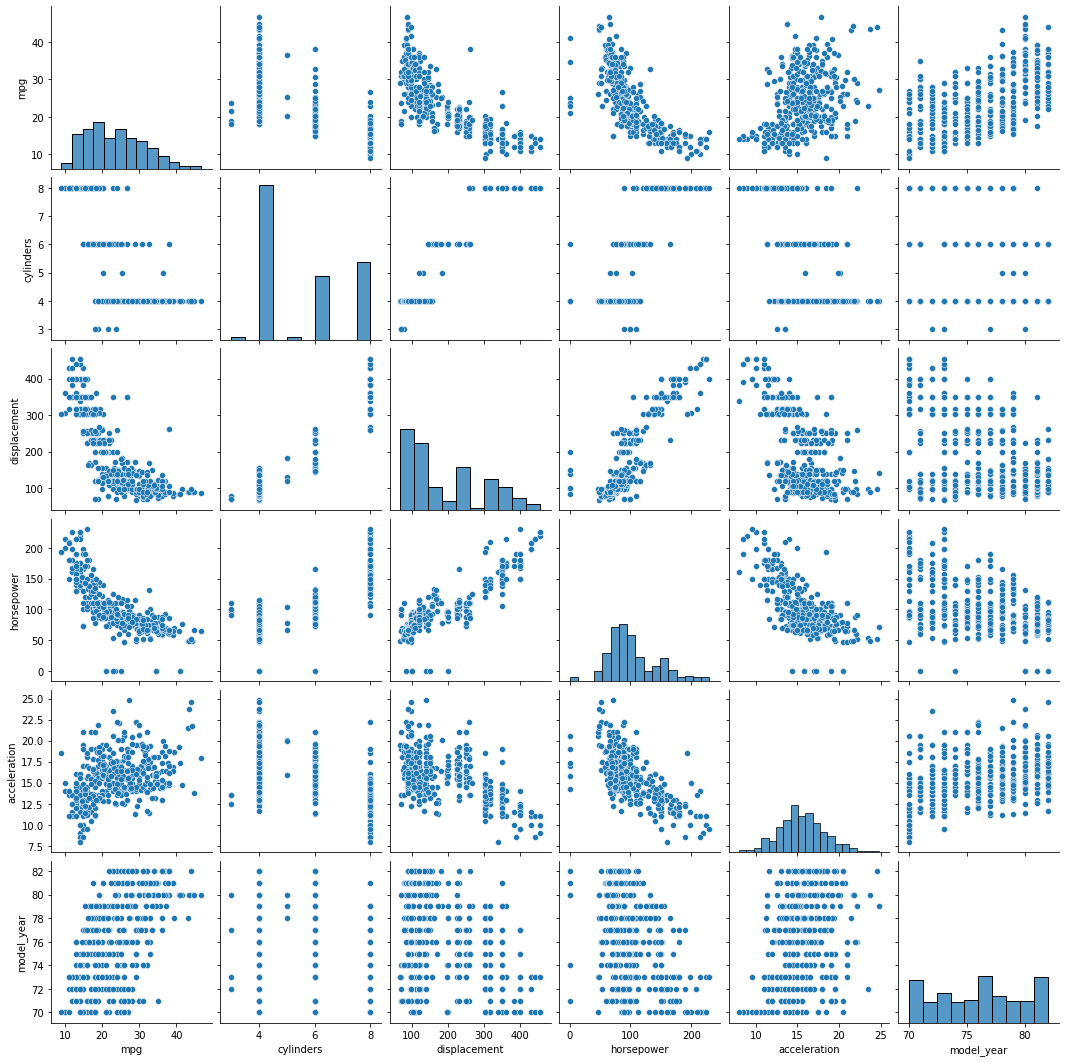

In [10]:
sns.pairplot(dataset)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


In [12]:
calc_vif(dataset[["mpg","cylinders"]])

,variables,VIF
0,mpg,3.275633
1,cylinders,3.275633


In [13]:
dataset[dataset['name']=="ford torino"]["origin"]

4    usa
Name: origin, dtype: object

In [19]:
from scipy.stats import ttest_ind
dataset = dataset.dropna()
name = dataset[dataset['name'] == 'ford torino']['origin']
name1 = dataset[dataset['name'] == 'ford ranger']['origin']

ttest_ind(name,name1)


TypeError: unsupported operand type(s) for /: 'str' and 'int'